# El método del codo y el factor de la silueta del clustering

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

In [17]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,1,2,3])
X = np.array(list(zip(x1,x2))).reshape(len(x1),2)

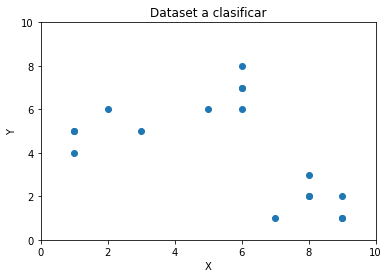

In [18]:
plt.plot()
plt.xlim([0,10])
plt.ylim([0,10])
plt.title("Dataset a clasificar")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x1,x2)
plt.show()

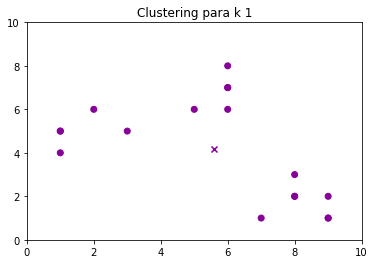

* Para k =  2  el promedio de la silueta es de:  0.6262223331361547
   - Para i =  1  la silueta del cluster vale:  0.7895107952768391
   - Para i =  2  la silueta del cluster vale:  0.5119204096376757


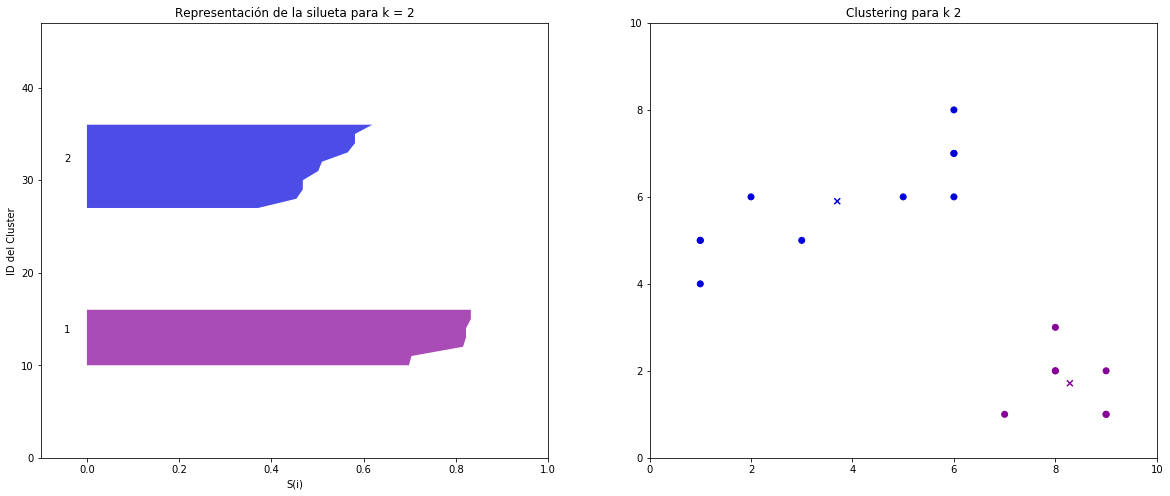

* Para k =  3  el promedio de la silueta es de:  0.7207852668257416
   - Para i =  1  la silueta del cluster vale:  0.7553563913895724
   - Para i =  2  la silueta del cluster vale:  0.7322200728725188
   - Para i =  3  la silueta del cluster vale:  0.6609508863896014


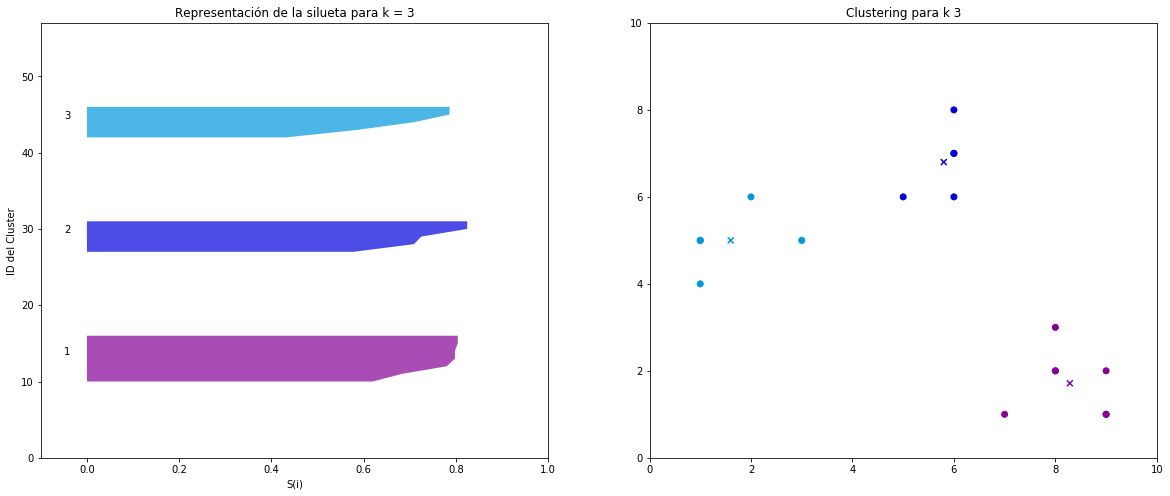

* Para k =  4  el promedio de la silueta es de:  0.6475721928097881
   - Para i =  1  la silueta del cluster vale:  0.654458796162702
   - Para i =  2  la silueta del cluster vale:  0.7553563913895724
   - Para i =  3  la silueta del cluster vale:  0.24096929517637128
   - Para i =  4  la silueta del cluster vale:  0.655666655624379


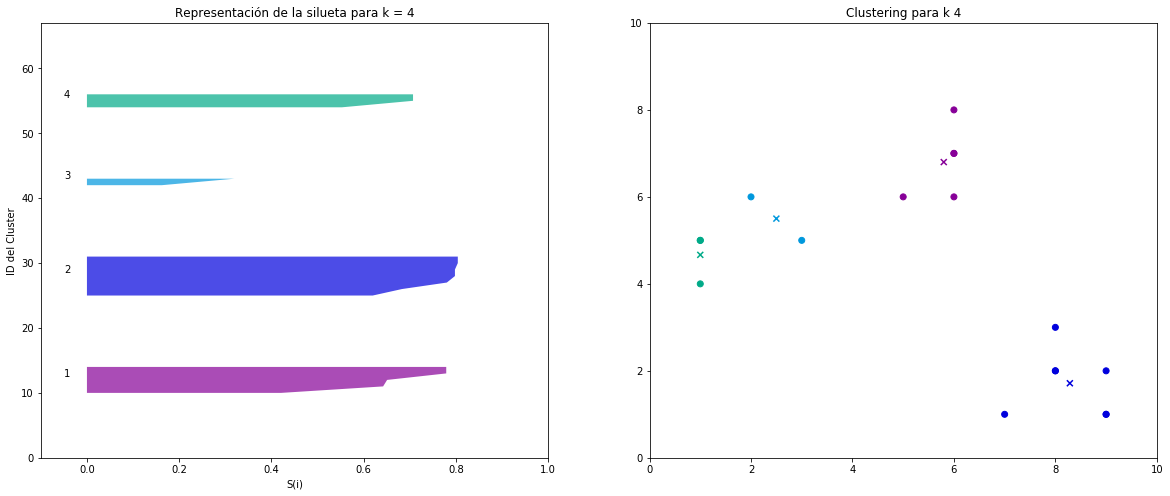

* Para k =  5  el promedio de la silueta es de:  0.5090656138215053
   - Para i =  1  la silueta del cluster vale:  0.5752863144878589
   - Para i =  2  la silueta del cluster vale:  0.24096929517637128
   - Para i =  3  la silueta del cluster vale:  0.654458796162702
   - Para i =  4  la silueta del cluster vale:  0.655666655624379
   - Para i =  5  la silueta del cluster vale:  0.3017559883656564


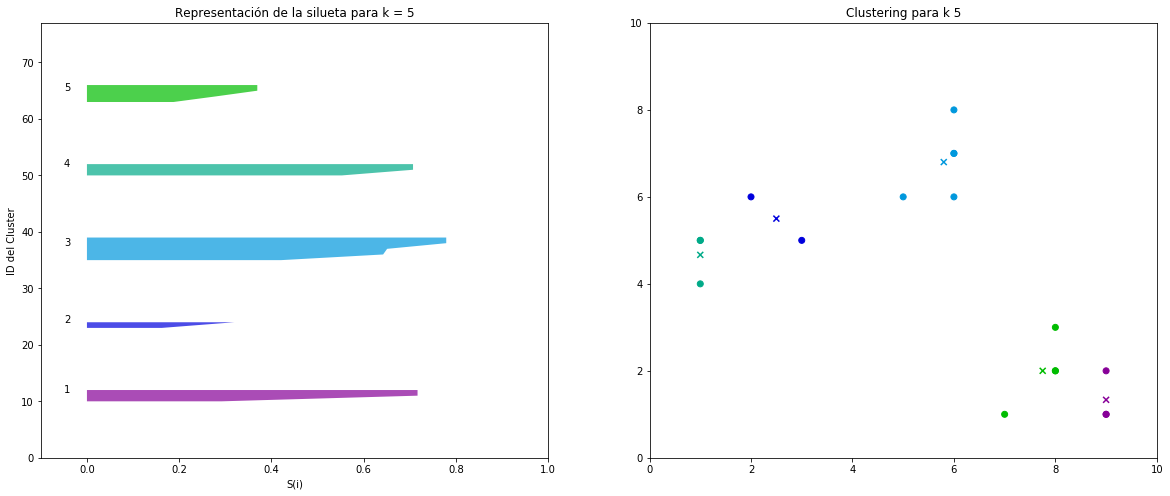

* Para k =  6  el promedio de la silueta es de:  0.394213972120446
   - Para i =  1  la silueta del cluster vale:  0.5752863144878589
   - Para i =  2  la silueta del cluster vale:  0.24096929517637128
   - Para i =  3  la silueta del cluster vale:  0.32995401797387514
   - Para i =  4  la silueta del cluster vale:  0.655666655624379
   - Para i =  5  la silueta del cluster vale:  0.3017559883656564
   - Para i =  6  la silueta del cluster vale:  0.0


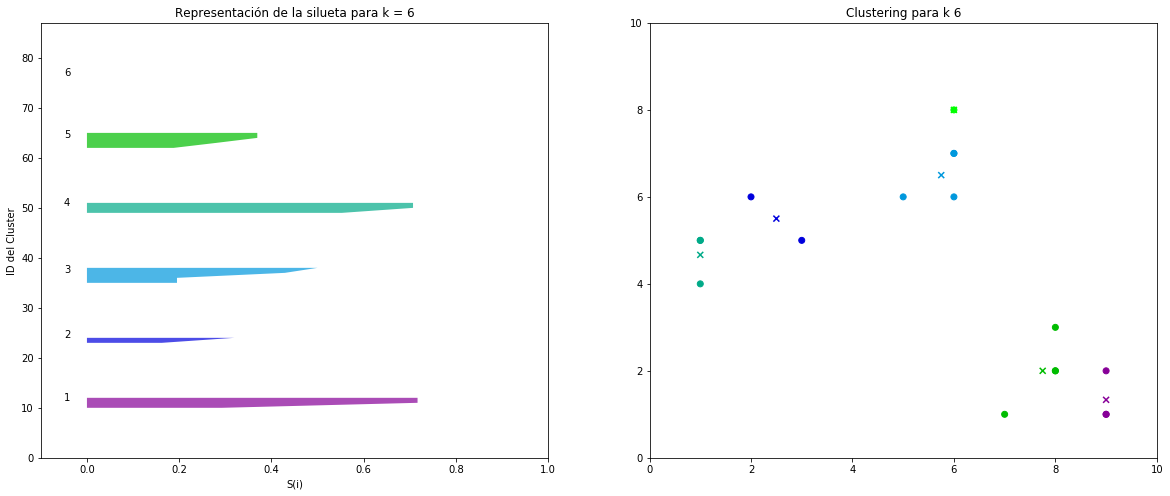

* Para k =  7  el promedio de la silueta es de:  0.47304189232654786
   - Para i =  1  la silueta del cluster vale:  0.5664789734180768
   - Para i =  2  la silueta del cluster vale:  0.5689115476681206
   - Para i =  3  la silueta del cluster vale:  0.24096929517637128
   - Para i =  4  la silueta del cluster vale:  0.509653732104414
   - Para i =  5  la silueta del cluster vale:  0.655666655624379
   - Para i =  6  la silueta del cluster vale:  0.0
   - Para i =  7  la silueta del cluster vale:  0.32882042637679976


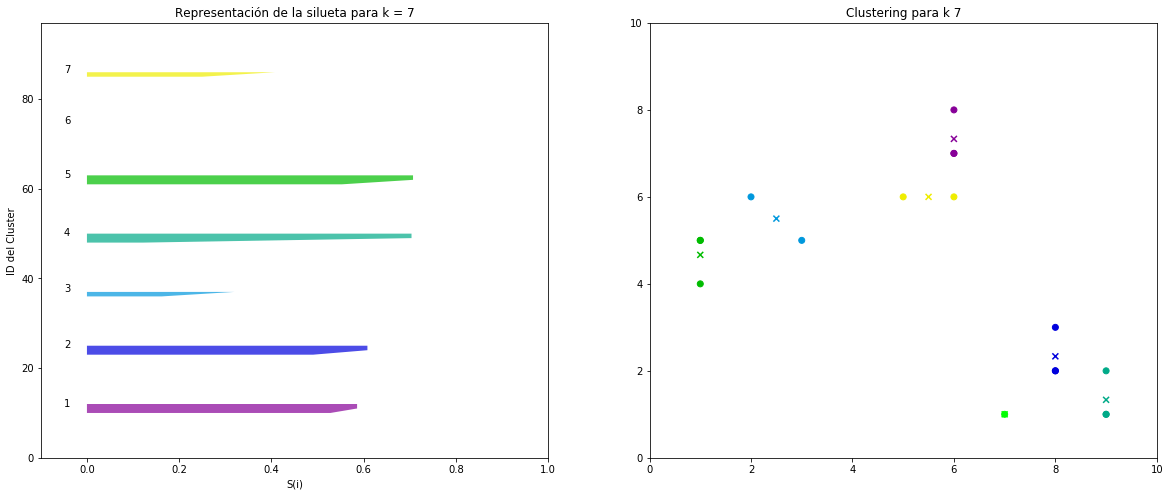

* Para k =  8  el promedio de la silueta es de:  0.43755607268464286
   - Para i =  1  la silueta del cluster vale:  0.32882042637679976
   - Para i =  2  la silueta del cluster vale:  0.509653732104414
   - Para i =  3  la silueta del cluster vale:  0.6152265411044983
   - Para i =  4  la silueta del cluster vale:  0.5689115476681206
   - Para i =  5  la silueta del cluster vale:  0.0
   - Para i =  6  la silueta del cluster vale:  0.0
   - Para i =  7  la silueta del cluster vale:  0.5664789734180768
   - Para i =  8  la silueta del cluster vale:  0.0


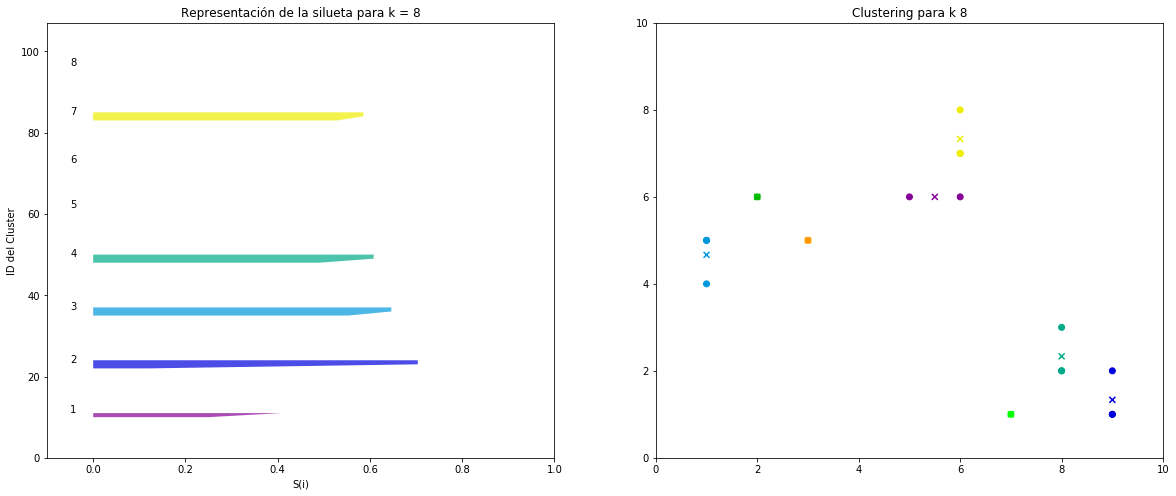

* Para k =  9  el promedio de la silueta es de:  0.4236916115483132
   - Para i =  1  la silueta del cluster vale:  0.3333333333333333
   - Para i =  2  la silueta del cluster vale:  0.32882042637679976
   - Para i =  3  la silueta del cluster vale:  0.6152265411044983
   - Para i =  4  la silueta del cluster vale:  0.5664789734180768
   - Para i =  5  la silueta del cluster vale:  0.0
   - Para i =  6  la silueta del cluster vale:  1.0
   - Para i =  7  la silueta del cluster vale:  0.0
   - Para i =  8  la silueta del cluster vale:  0.0
   - Para i =  9  la silueta del cluster vale:  0.0


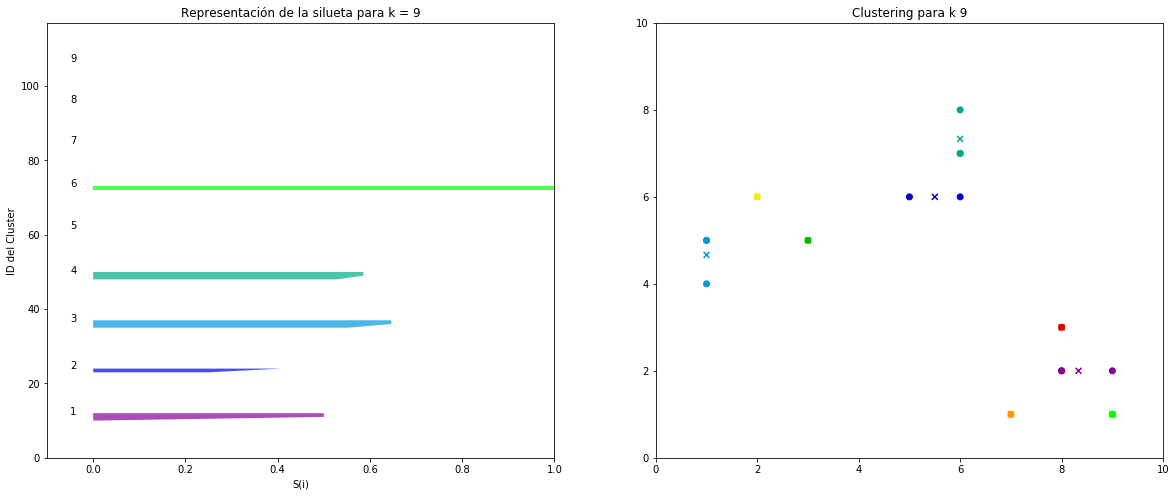

In [21]:
max_k = 10 # Máximo número de clusters que vamos a crear
K = range(1,max_k)
ssw = []
color_palette = [plt.cm.nipy_spectral(float(i)/max_k) for i in K]
centroid = [sum(X)/len(X) for i in K]
sst = sum(np.min(cdist(X, centroid, "euclidean"), axis=1))

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    ssw_k = sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis=1))
    ssw.append(ssw_k)
    label_color = [color_palette[i] for i in labels]
    # Fabricar silueta para cada cluster
    # No hacer silueta si K=1 o K=len(X)
    if 1<k<len(X):
        # Subplot de 1 fila y 2 columnas
        fig, (axis1,axis2) = plt.subplots(1,2)
        fig.set_size_inches(20,8)
        # El primer subplot contendrá la sileta que puede tener valores desde -1 a 1
        axis1.set_xlim([-0.1, 1.0])
        # El número de clusters a insertar determinará el tamaño de cada barra
        # El coeficiente (n_clusters+1)*10 será el espacio en blanco que dejaremos entre siluetas individuales
        # de cada cluster para separarlas.
        axis1.set_ylim([0, len(X)+(k+1)*10])
        
        silhouette_avg = silhouette_score(X, labels)
        print("* Para k = ",k, " el promedio de la silueta es de: ", silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, labels)
        
        y_lower = 10
        for i in range(k):
            # Agregamos la silueta del cluster i-ésimo
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print("   - Para i = ", i+1, " la silueta del cluster vale: ", np.mean(ith_cluster_sv))
            # Ordenamos descendientemente las siluetas del cluster i-ésimo
            ith_cluster_sv.sort()
            #Calculamos donde colocar la primera silueta en el eje vertical
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            # Elegimos el color del cluster
            color = color_palette[i]
            # Pintamos la silueta del cluster i-ésimo
            axis1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sv, facecolor = color, alpha = 0.7)
            
            # Etiquetamos dicho cluster con el número en el centro
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i+1))
            # Calculamos el nuevo y_lower para el siguiente cluster del gráfico
            y_lower = y_upper + 10 # dejamos vacías 10 posiciones sin muestra
            
        axis1.set_title("Representación de la silueta para k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del Cluster")
        
        # Fin de la representación de la silueta
    # Plot de los k-means con los puntos respectivos
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title("Clustering para k %s"%str(k))
    plt.scatter(x1,x2,c=label_color)
    plt.scatter(centers[0], centers[1], c = color_palette[0:len(centers)], marker = "x")
    plt.show()

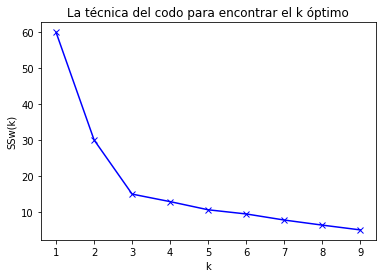

In [22]:
# Representación del codo
plt.plot(K, ssw, "bx-")
plt.xlabel("k")
plt.ylabel("SSw(k)")
plt.title("La técnica del codo para encontrar el k óptimo")
plt.show()

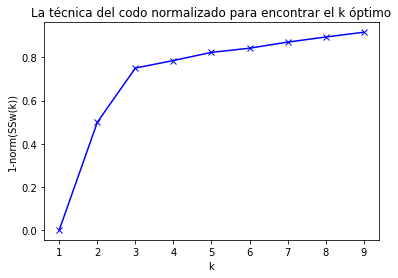

In [23]:
# Representación del codo normalizado
plt.plot(K, 1-ssw/sst, "bx-")
plt.xlabel("k")
plt.ylabel("1-norm(SSw(k))")
plt.title("La técnica del codo normalizado para encontrar el k óptimo")
plt.show()